In [349]:

# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For data preprocessing
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.neural_network import MLPClassifier  # For scikit-learn's MLP classifier
from keras.models import Sequential  # For Keras' sequential model
from keras.layers import Dense  # For Keras' dense layer
from sklearn.metrics import accuracy_score  # For calculating accuracy
import matplotlib.pyplot as plt  # For plotting

# Load the Titanic dataset from a CSV file
df = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [350]:
# df.drop_duplicates(inplace=True)import heapq

class PuzzleNode:
    def __init__(self, state, parent=None, move=0, depth=0):
        self.state = state
        self.parent = parent
        self.move = move
        self.depth = depth
        self.manhattan = self.calculate_manhattan()

  

def get_neighbors(node):
    neighbors = []
    for i in range(3):
        for j in range(3):
            if node.state[i][j] == 0:
                x, y = i, j
                break
    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    for dx, dy in moves:
        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < 3 and 0 <= new_y < 3:
            new_state = [row[:] for row in node.state]
            new_state[x][y], new_state[new_x][new_y] = new_state[new_x][new_y], new_state[x][y]
            neighbors.append(PuzzleNode(new_state, parent=node, move=(new_x, new_y), depth=node.depth + 1))
    return neighbors

def reconstruct_path(node):
    path = []
    while node:
        path.append(node.state)
        node = node.parent
    return path[::-1]

def astar_search(initial_state):
    start_node = PuzzleNode(initial_state)
    if start_node.manhattan == 0:
        return [start_node.state]
    frontier = [start_node]
    explored = set()
    while frontier:
        node = heapq.heappop(frontier)
        if node.state == [[1,2,3],[4,5,6],[7,8,0]]:
            return reconstruct_path(node)
        explored.add(tuple(map(tuple, node.state)))
        for neighbor in get_neighbors(node):
            if tuple(map(tuple, neighbor.state)) not in explored:
                heapq.heappush(frontier, neighbor)

# Example usage
initial_state = [[1, 2, 3], [4, 0, 6], [7, 5, 8]]
solution = astar_search(initial_state)
for step in solution:
    print(step)


In [351]:
# Drop unnecessary columns from the dataset
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'], axis=1, inplace=True)


In [352]:
# Create a LabelEncoder object

encoder = LabelEncoder()

gender_encoded=encoder.fit_transform(df['Sex'])
df['Sex']=gender_encoded


df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [353]:
# Remove rows with missing values from the dataframe
df.dropna

<bound method DataFrame.dropna of      Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0           0       3    1  22.0      1      0   7.2500
1           1       1    0  38.0      1      0  71.2833
2           1       3    0  26.0      0      0   7.9250
3           1       1    0  35.0      1      0  53.1000
4           0       3    1  35.0      0      0   8.0500
..        ...     ...  ...   ...    ...    ...      ...
886         0       2    1  27.0      0      0  13.0000
887         1       1    0  19.0      0      0  30.0000
888         0       3    0   NaN      1      2  23.4500
889         1       1    1  26.0      0      0  30.0000
890         0       3    1  32.0      0      0   7.7500

[891 rows x 7 columns]>

In [354]:
# Replace all occurrences of '-' with NaN (Not a Number) in the dataframe
df.replace('-', np.nan, inplace=True)

In [355]:
# Impute missing values in the dataframe using the mean strategy
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [356]:
# Scale the dataframe to have zero mean and unit variance

scaler = StandardScaler()
scaler.fit(df)
normalized_data = scaler.transform(df)

In [357]:
# Split the data into training and testing sets
target=df['Survived']
train_data, test_data, train_target, test_target = train_test_split(df, target, test_size=0.2, random_state=42)
print(train_data.shape, test_data.shape, train_target.shape, test_target.shape)

In [359]:
# Scale the training and testing data using the StandardScaler

X_train_scaled = scaler.fit_transform(train_data)
X_test_scaled = scaler.transform(test_data)

In [360]:
# Train scikit-learn MLP model
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', alpha=0.001, batch_size=100, max_iter=1000)
mlp.fit(X_train_scaled, train_target)

MLPClassifier(alpha=0.001, batch_size=100, hidden_layer_sizes=(50, 50),
              max_iter=1000)

In [361]:
# Create a neural network model with two hidden layers
model = Sequential()
model.add(Dense(2, input_dim=3, activation='sigmoid'))  # Hidden layer with 2 units
model.add(Dense(2, activation='sigmoid'))  # Output layer with 2 units

In [362]:
# Compile the neural network model with mean squared error loss, stochastic gradient descent optimizer, and accuracy metric
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])



In [363]:
# Define a list of Multi-Layer Perceptron (MLP) classifiers with varying hidden layer sizes
models_MLP = [
MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),
MLPClassifier(hidden_layer_sizes=(10,20), max_iter=100),
MLPClassifier(hidden_layer_sizes=(10, 20, 50), max_iter=100),
MLPClassifier(hidden_layer_sizes=(10, 20, 50, 100), max_iter=100) ]

In [364]:
# Define a list of Keras neural network models with varying complexity

Models_Keras = [
Sequential([
Dense(10, input_dim=7, activation='relu'), 
Dense(1, activation='sigmoid') 
]),
Sequential([
Dense(10, input_dim=7, activation='relu'), 
Dense(20, activation='relu'), 
Dense(1, activation='sigmoid')
]),
Sequential([
Dense(10, input_dim=7, activation='relu'),
Dense(20, activation='relu'), 
Dense(50, activation='relu'), 
Dense(1, activation='sigmoid') 
]),
Sequential([
Dense(10, input_dim=7, activation='relu'), 
Dense(20, activation='relu'), 
Dense(50, activation='relu'), 
Dense(100, activation='relu'), 
Dense(1, activation='sigmoid') 
])
]


In [365]:
# Evaluate the accuracy of each MLP model in the list

accuracy_mlp = [] 

for model in models_MLP: 
    # Train the model on the training data
    model.fit(train_data, train_target) 

    # Use the trained model to predict the test data
    y_pred = model.predict(test_data) 

    # Calculate the accuracy of the model and append it to the accuracy list
    accuracy_mlp.append(accuracy_score(test_target, y_pred)) 

    # Print the accuracy of the current model
    print(accuracy_score(test_target, y_pred))

0.7262569832402235
0.8044692737430168
0.9497206703910615
1.0


In [366]:

# Initialize an empty list to store the accuracy of each model
accuracy_keras = []

# Loop over each model in the list
for model in Models_Keras:
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    model.fit(train_data, train_target, epochs=20)
    
    accuracy = model.evaluate(test_data, test_target)
    
    accuracy_keras.append(accuracy[1])
    
    print('Accuracy: %.2f' % accuracy[1])

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6633 - loss: 11.6237
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5846 - loss: 10.6611 
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6138 - loss: 7.6850 
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5314 - loss: 5.0217  
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3748 - loss: 3.7097 
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3633 - loss: 1.9405
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4333 - loss: 0.9570
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6639 - loss: 0.6828
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6697 - loss: 0.6846 
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7073 - loss: 0.6131
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7045 - loss: 0.6047
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.

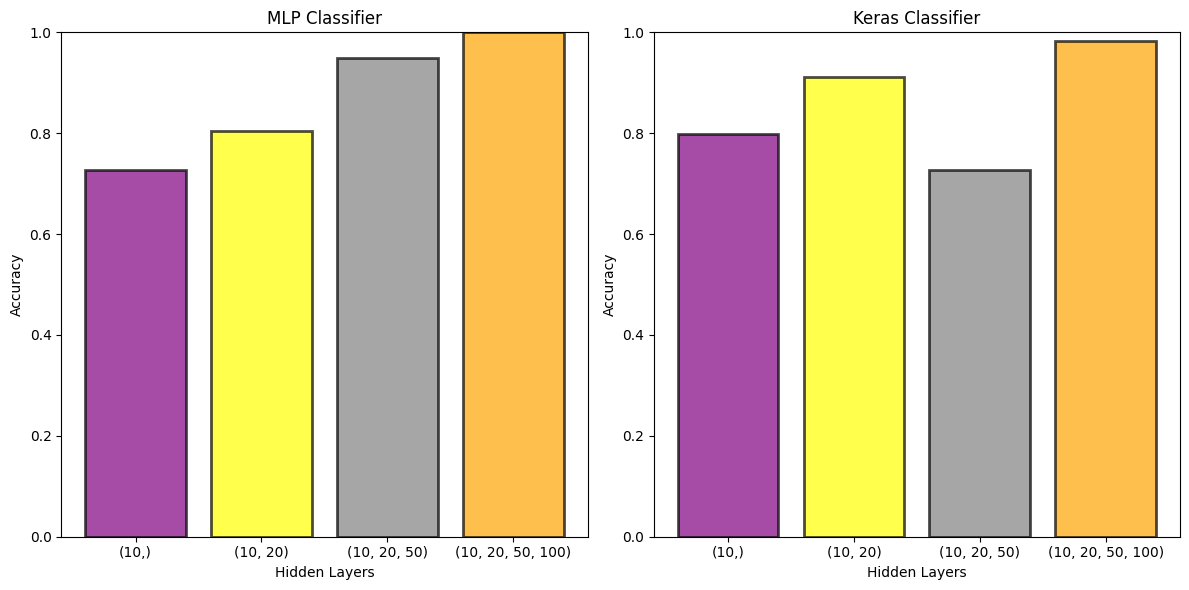

In [367]:
# Visualize the accuracy of MLP and Keras classifiers with varying hidden layers using bar charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(4), accuracy_mlp, color=['purple', 'yellow', 'gray', 'orange'], alpha=0.7, edgecolor='black', linewidth=2)
plt.xticks(range(4), ['(10,)', '(10, 20)', '(10, 20, 50)', '(10, 20, 50, 100)'])
plt.title('MLP Classifier')
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

plt.subplot(1, 2, 2)
plt.bar(range(4), accuracy_keras, color=['purple', 'yellow', 'gray', 'orange'], alpha=0.7, edgecolor='black', linewidth=2)
plt.xticks(range(4), ['(10,)', '(10, 20)', '(10, 20, 50)', '(10, 20, 50, 100)'])
plt.title('Keras Classifier')
plt.xlabel('Hidden Layers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

plt.tight_layout()
plt.show()